In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# import Requirement

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
%matplotlib inline

# 간단한 EDA

In [4]:
path = '/content/drive/MyDrive/data/programmers_ai/yujatea/comp_2/'

In [5]:
all_zero_submission = pd.read_csv(os.path.join(path, 'all_zero_submission.csv'))
random_submission = pd.read_csv(os.path.join(path, 'random_submission.csv'))

In [6]:
all_zero_submission.head()

,ID,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [7]:
random_submission.head()

,ID,label
0,0,4
1,1,0
2,2,6
3,3,0
4,4,4


In [8]:
print(all_zero_submission.info())
print(random_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      13491 non-null  int64
 1   label   13491 non-null  int64
dtypes: int64(2)
memory usage: 210.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      13491 non-null  int64
 1   label   13491 non-null  int64
dtypes: int64(2)
memory usage: 210.9 KB
None


In [9]:
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

In [10]:
train.head()

,ID,text,label
0,0,유소영비호감 성형아줌마,1
1,1,나오지마라 썅,3
2,2,식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러~~!!!,6
3,3,성희롱 당할 얼굴이 아닌데?ㅋㅋㅋ,5
4,4,"""끝까지 해보자~쪽파리 원숭이 자한 쓰레기당""",0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65863 entries, 0 to 65862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      65863 non-null  int64 
 1   text    65863 non-null  object
 2   label   65863 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [12]:
train['label'].value_counts()

6    24900
3     8895
2     8481
0     8463
1     7107
4     4118
5     3899
Name: label, dtype: int64

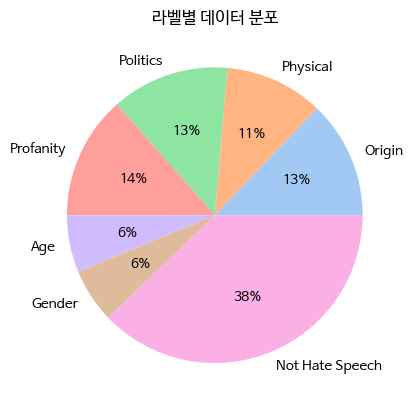

In [13]:
data = list(train.groupby('label').count()['ID'])

colors = sns.color_palette('pastel')[0:7]
labels = ['Origin', 'Physical','Politics', 'Profanity', 'Age', 'Gender', 'Not Hate Speech']
plt.title('라벨별 데이터 분포')
plt.pie(x=data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Data Preprocessing

## 1.  Tokenizer

* soynlp 토크나이저 사용
  * 이유
    * 문장간 띄워쓰기 불분명 해보임.(대체로 리뷰성 글들의 특징같음)
    * 신조어가 섞여 있음.

  * https://github.com/lovit/soynlp


In [14]:
# mecab 설치 => 형태소 분석기 = 토큰화
# Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

In [15]:
# from torchtext import data # torchtext.data 임포트
# from konlpy.tag import Mecab

In [16]:
max_length = 0
for row in train.iterrows():
 max_length = max(len(row[1][1]), max_length)

In [17]:
print(max_length)

306


In [18]:
import re

In [19]:
# 특수기호와 "ㅋ" 제거를 위한 정규표현식
pattern1 = '[^\w\s]'
pattern2 = 'ㅋ+'
combined_pattern = '|'.join([pattern1, pattern2])

In [20]:
# applymap() 메서드를 사용하여 정규표현식 적용
def clean_text(s):
    s = re.sub(combined_pattern, '', s)
    return s

In [21]:
train['text'] = train['text'].map(clean_text)

In [22]:
train.head()

,ID,text,label
0,0,유소영비호감 성형아줌마,1
1,1,나오지마라 썅,3
2,2,식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러,6
3,3,성희롱 당할 얼굴이 아닌데,5
4,4,끝까지 해보자쪽파리 원숭이 자한 쓰레기당,0


In [23]:
# 한글 띄워쓰기 패키지
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-1242en7c
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-1242en7c
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit a058e90c9de41889c63bf2ee454bf1de064d70ff
  Preparing metadata (setup.py) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [24]:
from pykospacing import Spacing

#test
test = "유소영비호감 성형아줌마"

spacing = Spacing()
kospacing_sent = spacing(test)
print(kospacing_sent)


유소영 비호감 성형아줌마


In [25]:
# train['text'] = train['text'].map(spacing)

In [26]:
# train.to_csv('train_preprocessed.csv', index=False)

In [27]:
preprocess = pd.read_csv(os.path.join(path,'train_preprocessed.csv'))
preprocess.head()

,ID,text,label
0,0,유소영 비호감 성형아줌마,1
1,1,나오지 마라 썅,3
2,2,식상하고 지 긋지긋했는데 잘 끝나 네 오예 소리 벗고 빤스 질러,6
3,3,성희롱 당할 얼굴이 아닌데,5
4,4,끝까지 해보자 쪽 파리 원숭이 자 한 쓰레기당,0


In [28]:
# 'ㅎ', 'ㅇ' 제거
pattern = "[ㅎㅇ]+"
preprocess['text'] = preprocess['text'].str.replace(pattern, '', regex=True)

In [29]:
preprocess.head()

,ID,text,label
0,0,유소영 비호감 성형아줌마,1
1,1,나오지 마라 썅,3
2,2,식상하고 지 긋지긋했는데 잘 끝나 네 오예 소리 벗고 빤스 질러,6
3,3,성희롱 당할 얼굴이 아닌데,5
4,4,끝까지 해보자 쪽 파리 원숭이 자 한 쓰레기당,0


In [30]:
# ㄷ연속으로 나오는 형태 제거
preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{2,}\b', '')

<ipython-input-30-5acf8cfc5d9c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{2,}\b', '')


In [31]:
preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{1,}\b', '')
preprocess['text'] = preprocess['text'].str.replace(r'\bㅠ{1,}\b', '')

<ipython-input-31-465ea0bc971e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㄷ{1,}\b', '')
<ipython-input-31-465ea0bc971e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㅠ{1,}\b', '')


In [32]:
preprocess['text'] = preprocess['text'].str.replace(r'\bㅜ{1,}\b', '')

<ipython-input-32-50dbafa9500d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  preprocess['text'] = preprocess['text'].str.replace(r'\bㅜ{1,}\b', '')


In [33]:
# 비속어 처리
vocab = [
    ('[ㅅㅂ]', '시발'),
    ('ㅉ+', '쯧'),
    ('ㄹㅇ', '리얼'),
    ('ㅅㄲ', '새끼'),
    ('ㅂㅅ', '병신'),
    ('ㄱㅅㄲ', '개새끼'),
    ('ㅈㄴ', '존나'),
    ('ㅈㄹ', '지랄'),
    ('ㅈ+', '좆'),
    ('(ㅂㄷ)+', '부들')
]

In [34]:
for k, r in vocab:
  pattern = k
  preprocess['text'] = preprocess['text'].str.replace(pattern, '', regex=True)

In [35]:
# 자음이나 모음으로만 이루어진 부분 제거
pattern = '[ㄱ-ㅎㅏ-ㅣ]+'
preprocess['text'] = preprocess['text'].str.replace(pattern, '', regex=True)

In [36]:
preprocess.to_csv('clean_data.csv', index=False)

* 영어가 포함된 문자열
* 혹은 영어로만 이루어진 문자열
* 한국 욕을 영어로 소리나는 대로 쓴 문자열들은 어떻게 해야되지?

In [37]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from googletrans import Translator

# Translator 클래스 객체 선언 (translator라는 변수명은 마음대로 정해주면 됨)
translator = Translator()

In [52]:
result = translator.translate('hi', dest='ko')
result.text

'안녕'

In [74]:
x = "Mi chin nyen"
print(translator.translate(x, dest='ko').text)
print(re.match(r'^[a-zA-Z\s]*$', x))

벽 턱
<re.Match object; span=(0, 12), match='Mi chin nyen'>


In [72]:
pattern = r'^[a-zA-Z\s]+$'
except_list = []
for i in range(len(preprocess)):
  x = preprocess['text'][i]
  try:
    if re.match(pattern, x):
      preprocess['text'][i] = translator.translate(x, dest='ko').text
  except:
    print(i)
    except_list.append(i)

870
1102
1266
1482
1604
1935
2400
2842
3062
3197
3491
5801
6235
9858
10692
12903
13635
14599
15315


<ipython-input-72-4a6e7df45543>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess['text'][i] = translator.translate(x, dest='ko').text


16866
18249
20187
20278
21764
23798
25696
26127
27088
31842
31896
33989
35800
36395
36760
39122
39416
40569
41617
42475
44590
46479
46600
47196
50807
51322
51680
52116
53899
55838
56705
57695
57712
58499
60854
61058
61714
63933
64720
65218


In [71]:
len(except_list)

0